In [2]:
!pip install ultralytics

In [1]:


import os
HOME = os.getcwd()
print(HOME)

/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.193 🚀 Python-3.13.7 torch-2.8.0+cu128 CPU (Intel Core(TM) i3-10110U 2.10GHz)
Setup complete ✅ (4 CPUs, 23.3 GB RAM, 60.0/231.7 GB disk)


In [4]:


from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [5]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


image 1/1 /mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main/dog.jpeg: 640x384 1 person, 3 cars, 1 dog, 354.3ms
Speed: 68.2ms preprocess, 354.3ms inference, 83.7ms postprocess per image at shape (1, 3, 640, 384)


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1DwrK5IKCq5wNSGMZcdG")
project = rf.workspace("mariswary-deepak-4ajr0").project("garbage-can-overflow")
version = project.version(4)
dataset = version.download("yolov8")


/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main/datasets
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 662.3 kB/s  0:01:21m0:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 823.5 kB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 793.8 kB/s  0:00:05 eta 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached python_dotenv-1.1.1-py3-none-any.whl (20 kB)
  Attempting uninstall: idna━━╺━━━━━━━━━━━━━━━━━ 5/9 [opencv-python-headless]
    Found existing installation: idna 3.1090m━━━━━━━━━━━━━━━━━ 5/9 [opencv-python-headless]
    Uninstalling idna-3.10:╺━━━━━━━━━━━━━━━━━ 5/9 [opencv-python-headless]
      Successfully uninstalled idna-3.10━━━━━━━━━━━━━━━━━ 5/9 [opencv-python-headless]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


Extracting Dataset Version Zip to garbage-can-overflow-4 in yolov8:: 100%|██████████| 3960/3960 [00:02<00:00, 1662.44it/s]


## Custom Trainin

In [8]:
%cd {HOME}/datasets/garbage-can-overflow-4
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=20 imgsz=400 plots=True

/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main/datasets/garbage-can-overflow-4
Ultralytics 8.3.193 🚀 Python-3.13.7 torch-2.8.0+cu128 CPU (Intel Core(TM) i3-10110U 2.10GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=400, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, 

In [13]:
!ls {HOME}/runs/detect/train2
%cd {HOME}/datasets/garbage-can-overflow-4


ls: cannot access '/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main/runs/detect/train2': No such file or directory
/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main/datasets/garbage-can-overflow-4
/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main/datasets/garbage-can-overflow-4


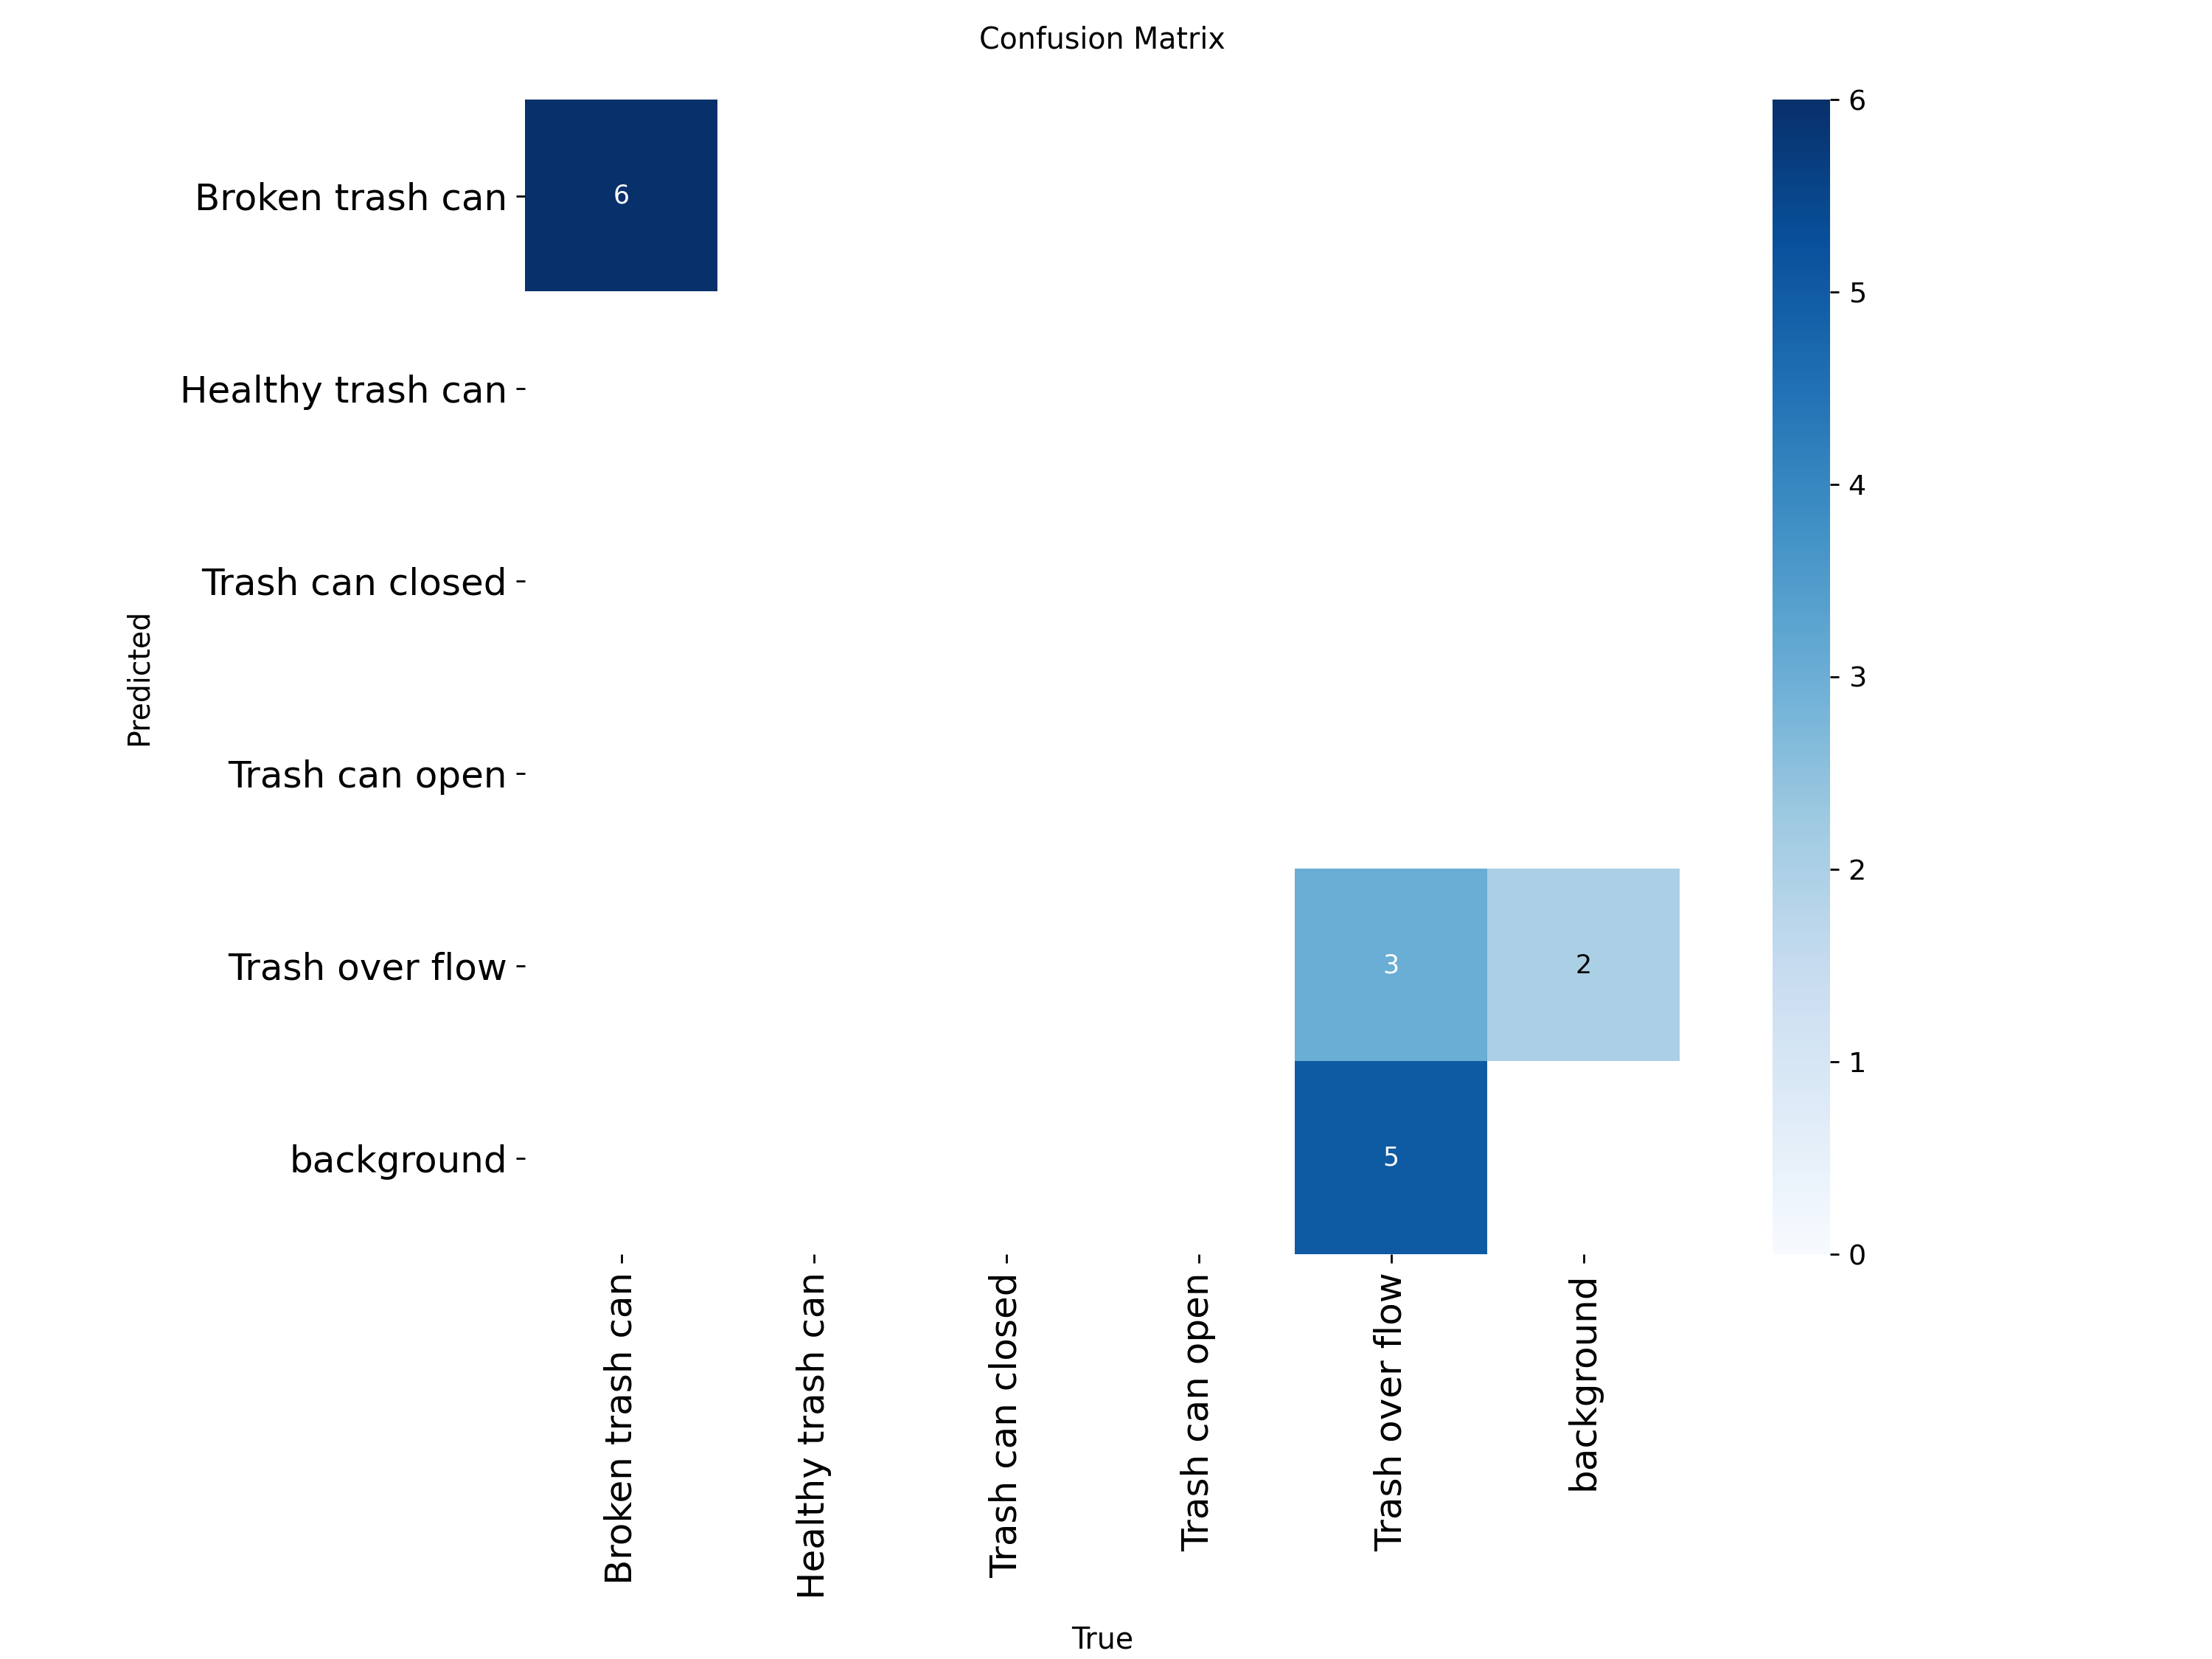

In [12]:
Image(filename=f'{HOME}/datasets/garbage-can-overflow-4/runs/detect/train2/confusion_matrix.png', width=600)

/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main


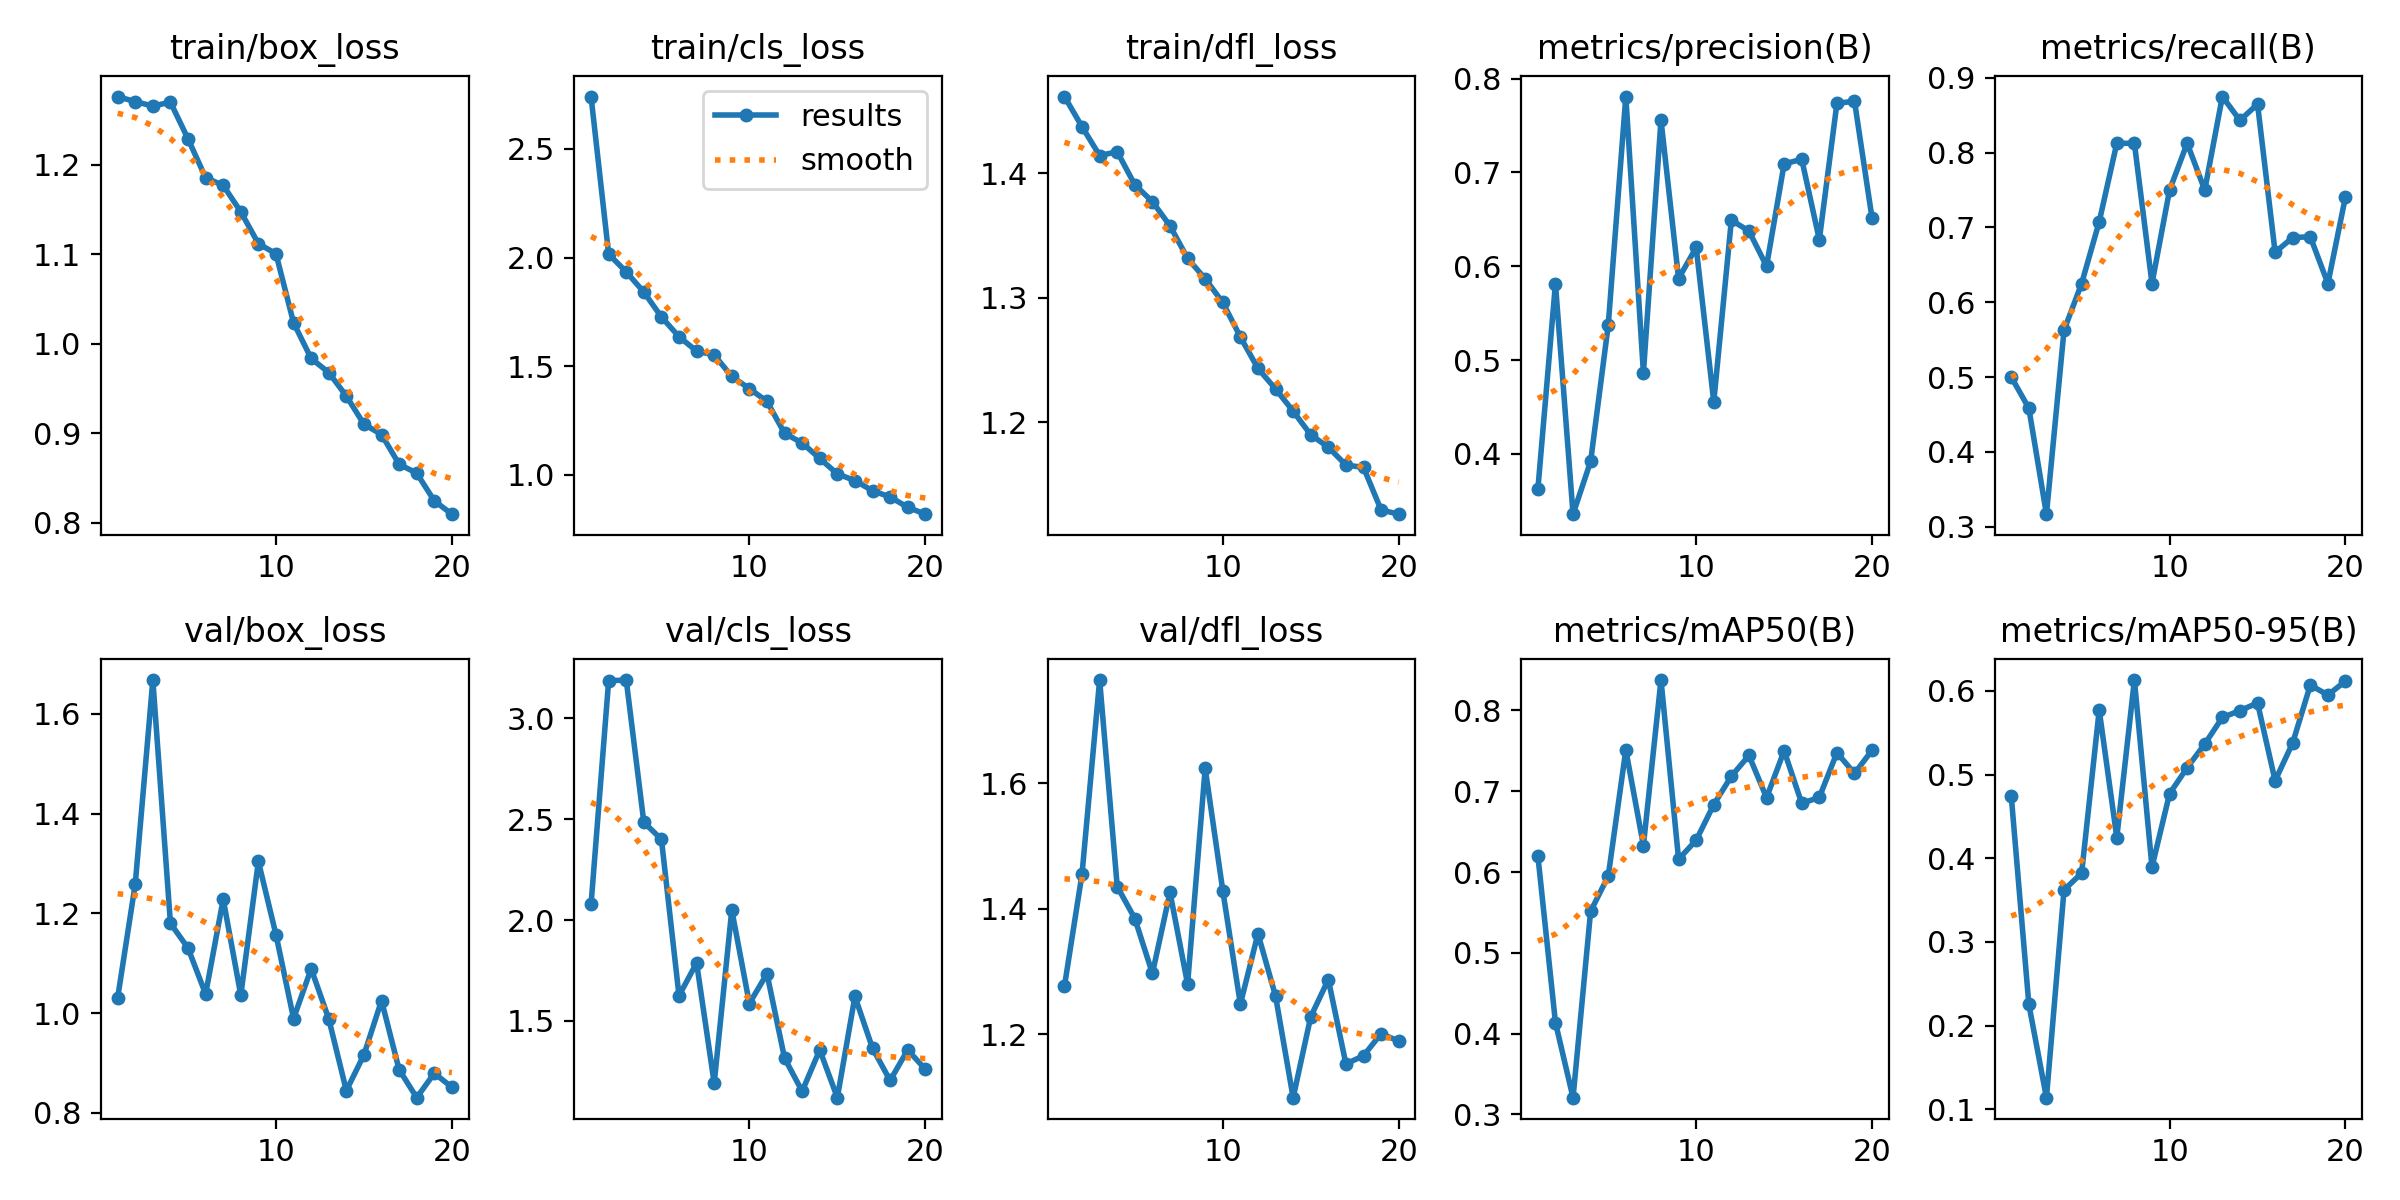

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/garbage-can-overflow-4/runs/detect/train2/results.png', width=600)

/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main


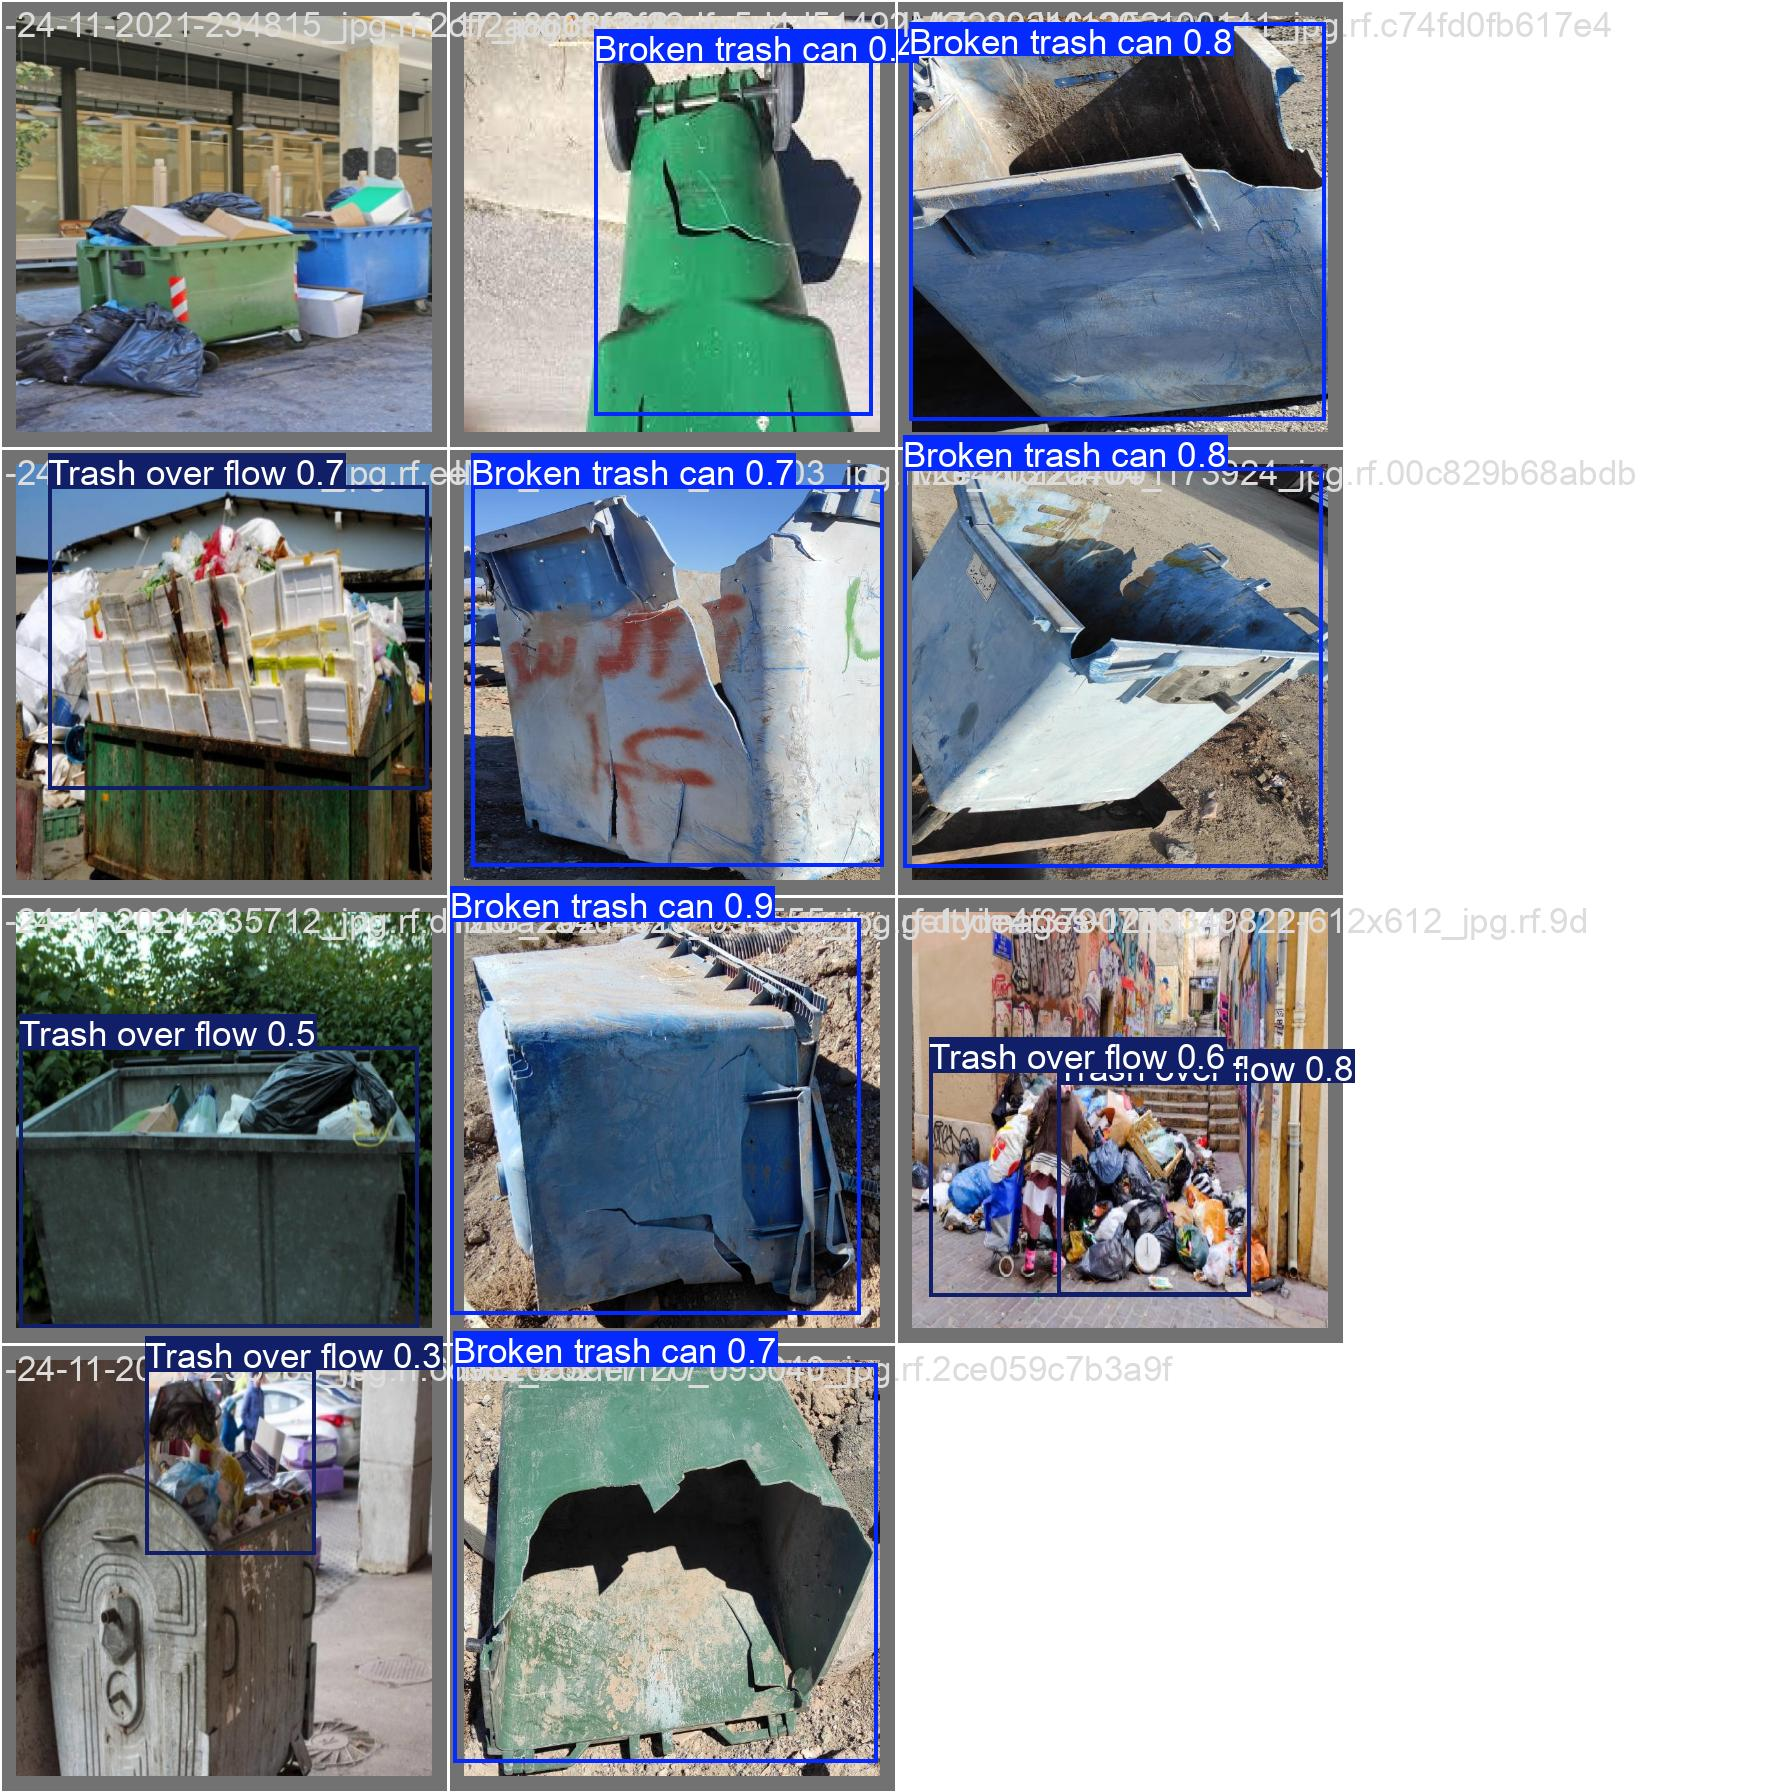

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/garbage-can-overflow-4/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

## Inference with Custom Model

In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/garbage-can-overflow-4/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main
Ultralytics 8.3.193 🚀 Python-3.13.7 torch-2.8.0+cu128 CPU (Intel Core(TM) i3-10110U 2.10GHz)
Ultralytics 8.3.193 🚀 Python-3.13.7 torch-2.8.0+cu128 CPU (Intel Core(TM) i3-10110U 2.10GHz)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/2 /mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main/datasets/garbage-can-overflow-4/test/images/48_jpg.rf.eb86677ba9f0114f2131b7c9acbc3169.jpg: 416x416 1 Healthy trash can, 1 Trash can closed, 226.9ms
image 1/2 /mnt/Programming/YOLOv8-Garbage-Overflow-Detection-on-a-Custom-Dataset-Real-Time-Detection-with-Flask-Web-App-main/datasets/garbage-can-overflow-4/test/images/48_jpg.rf.eb86677ba9f0114f2131b7c9acbc3169.jpg: 416x416 1 Healthy trash can, 1 Trash can close

**NOTE:** Let's take a look at few results.

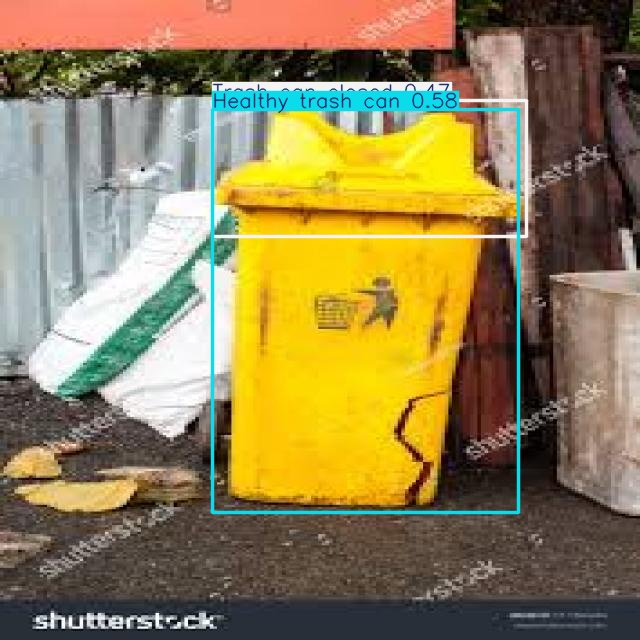

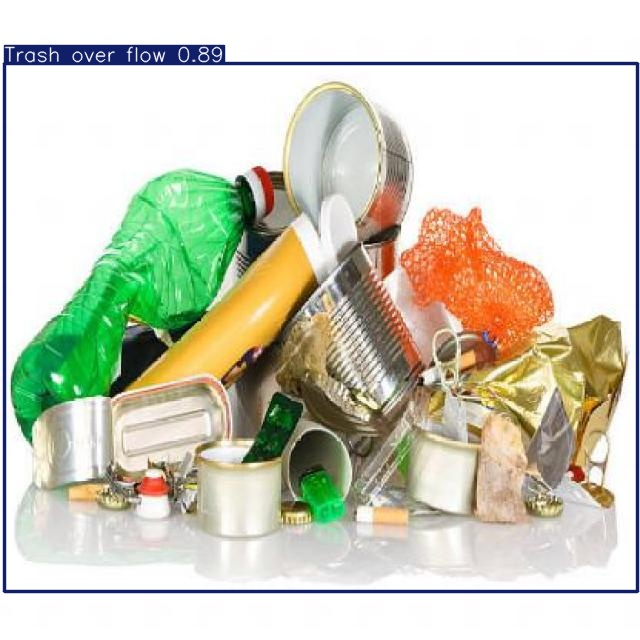

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook: